In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', None) 
pd.set_option("display.max_rows",100)

In [2]:
df = pd.read_pickle('/Users/pwu/dsi-plus/capstone/docker/postgres/data/all_cleaned_09092017.pkl')

In [3]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665556 entries, 0 to 1524085
Data columns (total 68 columns):
loan_amnt                     665556 non-null float64
funded_amnt                   665556 non-null float64
term                          665556 non-null int64
int_rate                      665556 non-null float64
installment                   665556 non-null float64
grade                         665556 non-null object
sub_grade                     665556 non-null object
emp_title                     665556 non-null object
emp_length                    665556 non-null object
home_ownership                665556 non-null object
annual_inc                    665556 non-null float64
verification_status           665556 non-null object
issue_d                       665556 non-null datetime64[ns]
loan_status                   665556 non-null object
purpose                       665556 non-null object
title                         665556 non-null object
addr_state                  

In [4]:
#change issue_d to year only since I only care about the year the loan was issued
df['issue_d']=pd.to_datetime(df['issue_d']).dt.year

In [5]:
df.head(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_mean,cr_line_days
0,5000.0,5000.0,36,0.1065,162.87,B,B2,NA,10+ years,RENT,24000.0,Verified,2011,Fully Paid,credit_card,Computer,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,5863.155187,0.0,0.0,0.0,0.0,0.0,4.685103,0.0,0.0,61.956015,0.0,0.0,125.761258,180.290193,12.658652,7.690894,0.0,23.363396,7.0,0.0,4.0,6.0,5.0,9.0,9.0,8.0,15.0,6.0,12.0,0.0,0.0,0.0,2.0,94.0,48.0,0.0,0.0,171681.0,48000.0,20627.0,0.0,737.0,849312000000000000
1,2500.0,2500.0,60,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011,Charged Off,car,bike,GA,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,1014.530000,0.0,0.0,0.0,0.0,0.0,4.685103,0.0,0.0,61.956015,0.0,0.0,125.761258,180.290193,12.658652,7.690894,0.0,23.363396,7.0,0.0,4.0,6.0,5.0,9.0,9.0,8.0,15.0,6.0,12.0,0.0,0.0,0.0,2.0,94.0,48.0,0.0,0.0,171681.0,48000.0,20627.0,0.0,742.0,399772800000000000
2,2400.0,2400.0,36,0.1596,84.33,C,C5,NA,10+ years,RENT,12252.0,Not Verified,2011,Fully Paid,small_business,real estate business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,3005.666844,0.0,0.0,0.0,0.0,0.0,4.685103,0.0,0.0,61.956015,0.0,0.0,125.761258,180.290193,12.658652,7.690894,0.0,23.363396,7.0,0.0,4.0,6.0,5.0,9.0,9.0,8.0,15.0,6.0,12.0,0.0,0.0,0.0,2.0,94.0,48.0,0.0,0.0,171681.0,48000.0,20627.0,0.0,737.0,318124800000000000
3,10000.0,10000.0,36,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011,Fully Paid,other,personel,CA,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,12231.890000,0.0,0.0,0.0,0.0,0.0,4.685103,0.0,0.0,61.956015,0.0,0.0,125.761258,180.290193,12.658652,7.690894,0.0,23.363396,7.0,0.0,4.0,6.0,5.0,9.0,9.0,8.0,15.0,6.0,12.0,0.0,0.0,0.0,2.0,94.0,48.0,0.0,0.0,171681.0,48000.0,20627.0,0.0,692.0,499564800000000000
4,3000.0,3000.0,60,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011,Fully Paid,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,4066.908161,0.0,0.0,0.0,0.0,0.0,4.685103,0.0,0.0,61.956015,0.0,0.0,125.761258,180.290193,12.658652,7.690894,0.0,23.363396,7.0,0.0,4.0,6.0,5.0,9.0,9.0,8.0,15.0,6.0,12.0,0.0,0.0,0.0,2.0,94.0,48.0,0.0,0.0,171681.0,48000.0,20627.0,0.0,697.0,502243200000000000


36 months loans number Paid Off: 424574
36 months loans number Charged Off: 82236
36 months Loans Default Percentage: 16.23%

60 months loans number Paid Off: 106478
60 months loans number Charged Off: 52268
60 months Loans Default Percentage: 32.93%

Overall loans number Paid Off: 531052
Overall loans number Charged Off: 134504
Overall Loans Default Percentage: 20.21%


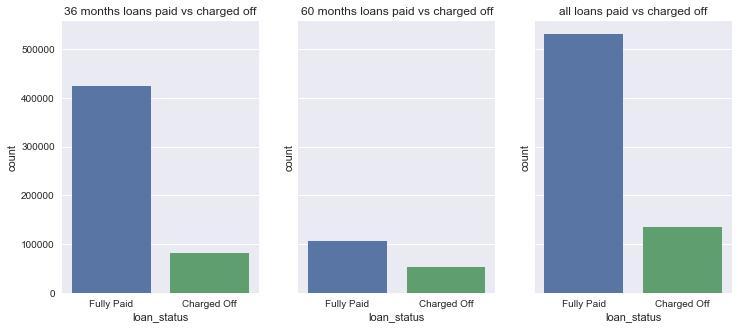

In [6]:
#Check Total Default Rate, 36 months default rate, 60 months default rate
cf36_mask = (df['loan_status']=='Charged Off') & (df['term']==36 )
cf60_mask = (df['loan_status']=='Charged Off') & (df['term']==60)
fp36_mask = (df['loan_status']=='Fully Paid') & (df['term']==36 )
fp60_mask = (df['loan_status']=='Fully Paid') & (df['term']==60 )
mask36 = df['term'] == 36
mask60 = df['term'] == 60
#sns.countplot(x = 'loan_status',data = df[mask36], ax = axes[0] )
#plt.rcParams['figure.figsize']=(3,3)
fig, axes = plt.subplots(1,3, figsize=(12,5),sharey = True)
sns.countplot(x = 'loan_status',data = df[mask36] , ax = axes[0], order =['Fully Paid', 'Charged Off'])
axes[0].set(title = '36 months loans paid vs charged off')
sns.countplot(x = 'loan_status',data = df[~mask36], ax = axes[1], order =['Fully Paid', 'Charged Off'])
axes[1].set(title = '60 months loans paid vs charged off')
sns.countplot(x = 'loan_status', data = df, ax = axes[2], order =['Fully Paid', 'Charged Off'])
axes[2].set(title = 'all loans paid vs charged off')
#plt.xlabel('Loan Status')
print('36 months loans number Paid Off: {}'.format(df[fp36_mask].shape[0]))
print('36 months loans number Charged Off: {}'.format(df[cf36_mask].shape[0]))
default_rate = (np.float64(df[cf36_mask].shape[0]) / np.float64(df[mask36].shape[0])*100).round(2)
print('36 months Loans Default Percentage: {}%\n'.format(default_rate))

print('60 months loans number Paid Off: {}'.format(df[fp60_mask].shape[0]))
print('60 months loans number Charged Off: {}'.format(df[cf60_mask].shape[0]))
default_rate = (np.float64(df[cf60_mask].shape[0]) / np.float64(df[mask60].shape[0])*100).round(2)
print('60 months Loans Default Percentage: {}%\n'.format(default_rate))

print('Overall loans number Paid Off: {}'.format(df[df['loan_status']=='Fully Paid'].shape[0]))
print('Overall loans number Charged Off: {}'.format(df[df['loan_status']=='Charged Off'].shape[0]))
default_rate = (np.float64(df[df['loan_status']=='Charged Off'].shape[0]) / np.float64(df.shape[0])*100).round(2)
print('Overall Loans Default Percentage: {}%'.format(default_rate))


In [7]:
#36 months loan
mask = (df['term']==36) & (df['issue_d']<2014) 
temp = pd.DataFrame(df[mask].groupby(['issue_d'])['funded_amnt','total_pymnt'].sum())
temp['total_gain_loss']= temp['total_pymnt'] - temp['funded_amnt']
temp['percentage_gain_loss']= ((temp['total_gain_loss']/temp['funded_amnt']) * 100).round(2)
temp['percentage_gain_loss']=temp['percentage_gain_loss'].astype(str) + "%"
temp.reset_index(inplace = True)
temp.columns = ['Issue_Year', 'Funded_Amount', 'Total_Payments_Received', 'Total_Gain_Loss', 'Percentage_Gain_Loss']
temp

,Issue_Year,Funded_Amount,Total_Payments_Received,Total_Gain_Loss,Percentage_Gain_Loss
0,2007,4.791550e+06,4.724421e+06,-6.712854e+04,-1.4%
1,2008,1.997502e+07,2.034670e+07,3.716769e+05,1.86%
2,2009,5.181475e+07,5.594071e+07,4.125963e+06,7.96%
3,2010,8.752452e+07,9.590180e+07,8.377275e+06,9.57%
4,2011,1.325311e+08,1.448371e+08,1.230602e+07,9.29%
5,2012,5.076712e+08,5.593133e+08,5.164208e+07,10.17%
6,2013,1.272090e+09,1.412113e+09,1.400235e+08,11.01%


In [8]:
#60 months loan
mask = (df['term']==60)  & (df['issue_d']<2012) 
temp = pd.DataFrame(df[mask].groupby(['issue_d'])['funded_amnt','total_pymnt'].sum())
temp['total_gain_loss']= temp['total_pymnt'] - temp['funded_amnt']
temp['percentage_gain_loss']= ((temp['total_gain_loss']/temp['funded_amnt']) * 100).round(2)
temp['percentage_gain_loss']=temp['percentage_gain_loss'].astype(str) + "%"
temp.reset_index(inplace = True)
temp.columns = ['Issue_Year', 'Funded_Amount', 'Total_Payments_Received', 'Total_Gain_Loss', 'Percentage_Gain_Loss']
temp

,Issue_Year,Funded_Amount,Total_Payments_Received,Total_Gain_Loss,Percentage_Gain_Loss
0,2010,38826650.0,4.493721e+07,6.110560e+06,15.74%
1,2011,124832550.0,1.445406e+08,1.970801e+07,15.79%


In [9]:
#mean interest rate by term
df.groupby(['term'])['int_rate'].mean()

term
36    0.124561
60    0.170265
Name: int_rate, dtype: float64

In [10]:
#compound interest calculation
def payment_calculator(amt, rate, duration):
    c = ((rate/12)*amt * (1 + (rate/12)) ** duration)/(((1+(rate/12))**duration)-1)
    tot_amnt = c * duration
    return tot_amnt - amt
print(payment_calculator(100, .124561, 36))
print(payment_calculator(100, .170265, 60))


20.35726335728394
49.20096146861886


### From this point on only 60 months loans analyzed.

In [11]:
mask = df['term'] == 60
long_loan= pd.DataFrame(df[mask])

In [12]:
#60 month loan mean interest rate by loan grade
tep = pd.DataFrame(long_loan.groupby(['grade'])['int_rate'].describe())
tep.reset_index(inplace = True)
tep.drop(['std', 'min','25%','50%','75%', 'max'], axis = 1, inplace = True)
tep.columns= ['Loan_Grade', 'Number_Of_Loans', 'Mean_Interest_Rate']
tep['Mean_Interest_Rate'] = ((tep['Mean_Interest_Rate']*100).round(2)).astype(str) + '%'
tep

,Loan_Grade,Number_Of_Loans,Mean_Interest_Rate
0,A,2615.0,7.99%
1,B,20460.0,10.91%
2,C,45943.0,14.35%
3,D,37521.0,17.49%
4,E,33024.0,20.41%
5,F,14905.0,23.95%
6,G,4278.0,26.26%


In [13]:
#60 month loan default rate by Loan Grade
mask1 = long_loan['loan_status'] == 'Charged Off'
tep2 = pd.DataFrame(long_loan[mask1]['grade'].value_counts()/long_loan['grade'].value_counts())
#long_loan[mask].groupby(['grade']).count()
tep2.reset_index(inplace = True)
tep2.columns = ['Loan_Grade','Default_Percentage']
tep2['Default_Percentage'] = (tep2['Default_Percentage']* 100).round(2).astype(str) + '%'
tep2.sort_values(['Loan_Grade'], ascending = True)

,Loan_Grade,Default_Percentage
0,A,9.48%
1,B,17.83%
2,C,26.74%
3,D,35.98%
4,E,41.36%
5,F,45.93%
6,G,48.64%


In [14]:
#split 60 month loan into Grade A,B(high) and C-G(low)
mask = (long_loan['grade']== 'A') | (long_loan['grade'] =='B') 
long_high = pd.DataFrame(long_loan[mask])
long_low = pd.DataFrame(long_loan[~mask])

In [15]:
mask1 = long_low['loan_status'] == 'Charged Off'

In [18]:
long_low['loan_status'].value_counts() / long_low.shape[0]

Fully Paid     0.643461
Charged Off    0.356539
Name: loan_status, dtype: float64

In [ ]:
loan_state_df = pd.DataFrame(long_low[['addr_state','loan_status']])
#group number of charge offs by state
temp = pd.get_dummies(loan_state_df, columns = ['loan_status'])
charge_off_by_state = pd.DataFrame(temp.groupby(['addr_state']).sum().sort_values(['loan_status_Charged Off'], ascending = False))
charge_off_by_state['Total_Loans'] = charge_off_by_state['loan_status_Charged Off'] + charge_off_by_state['loan_status_Fully Paid']
charge_off_by_state['charge_off_rate']= charge_off_by_state['loan_status_Charged Off']  / charge_off_by_state['Total_Loans']

charge_off_by_state.reset_index(inplace = True)
charge_off_by_state.sort_values(['charge_off_rate'], ascending = False)
charge_off_by_state.columns = ['State', 'Charged_Off', 'Fully_Paid', 'Total_Loans', 'Charge_Off_Rate']
#charge_off_by_state

In [ ]:
import plotly.tools as tls

tls.get_embed('https://plot.ly/~petehwu/1/')

In [ ]:
import plotly.plotly as py
import plotly
import pandas as pd
plotly.offline.init_notebook_mode(connected=True)
#charge_off_by_state

for col in charge_off_by_state.columns:
    charge_off_by_state[col] = charge_off_by_state[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

charge_off_by_state['text'] = charge_off_by_state['State'] + '<br>' +\
    'Total Loans '+charge_off_by_state['Total_Loans']+'<br>'+\
    'Fully Paid '+charge_off_by_state['Fully_Paid']+'<br>'+\
    'Charged Off '+charge_off_by_state['Charged_Off']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = charge_off_by_state['State'],
        z = (charge_off_by_state['Charge_Off_Rate'].astype(float)).round(4) ,
        locationmode = 'USA-states',
        text = charge_off_by_state['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Charge Off Rate")
        ) ]

layout = dict(
        title = '60 month loan Charge Off Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, filename='d3-cloropleth-map' )


In [ ]:
#drop more columns since I don't plan on using them for my analysis
long_low.drop(['term','grade','installment', \
               'emp_title', 'issue_d','title','funded_amnt', 'total_pymnt' ], axis = 1, inplace = True)


In [ ]:
#long_low.info()

In [ ]:
#make pickle file in case I need the start over
long_low.to_pickle('/Users/pwu/dsi-plus/capstone/docker/postgres/data/final_long_low_09092017.pkl')

In [ ]:
#make some heatmaps to see if I can find any interesting correlations

In [ ]:
plt.rcParams['figure.figsize']=(10,10)

In [ ]:
loan_state_df = pd.DataFrame(long_low2[['addr_state','loan_status']])
loan_state_df_corr = pd.get_dummies(loan_state_df, columns = ['addr_state','loan_status'])
sns.heatmap(loan_state_df_corr.corr(), annot= False)
plt.title('States vs. Loan Status Heatmap')

In [ ]:
emp_length_df = pd.DataFrame(long_low2[['emp_length', 'loan_status']])
emp_length_corr = pd.get_dummies(emp_length_df, columns = ['emp_length', 'loan_status'])
sns.heatmap(emp_length_corr.corr(), annot= False)
plt.title('Employment Length vs. Loan Status Heatmap')

In [ ]:
loan_grade_df_corr = pd.get_dummies(long_low2[[ 'sub_grade', 'loan_status']])
sns.heatmap(loan_grade_df_corr.corr())
plt.title('Loan Sub-grade vs. Loan Status Heatmap')


In [ ]:
other_cat_df_corr = pd.get_dummies(long_low2[[ 'home_ownership', 'verification_status', 'purpose', 'loan_status']])
sns.heatmap(other_cat_df_corr.corr())
plt.title('Categorical Features vs. Loan Status Heatmap')

In [ ]:
plt.rcParams['figure.figsize']=(13,13)
continuous_df = long_low.drop([ 
    'sub_grade',
    'emp_length',
    'home_ownership',
    'verification_status',
    'purpose',
    'addr_state',
  ], axis = 1)
continuous_df = pd.get_dummies(continuous_df, columns = ['loan_status'])
sns.heatmap(continuous_df.corr())
plt.title('Continuous Features vs. Loan Status Heatmap')

In [ ]:
#After looking at the heatmaps, I picked out a few continuous features that look like they have 
#some correlation with loan status and plotted some pair plots and distribution plots

In [ ]:
sns.pairplot(continuous_df[['loan_amnt','int_rate', 'annual_inc','dti','mort_acc','loan_status_Fully Paid']])

In [ ]:
#Looks like I have some outliers so I will remove any data that is more than 3 standard deviation away from the mean

In [ ]:
#plot some distribution graphs before removing outliers to see if there is any difference

mask = (long_low['loan_status']=='Fully Paid') 

fig, axes = plt.subplots(4,3, figsize=(15,15))
sns.distplot( long_low[mask]['int_rate'] , ax = axes[0,0])
sns.distplot( long_low[~mask]['int_rate'] , ax = axes[0,0], color = 'green')
axes[0,0].set( xlabel='Interest Rate')
sns.distplot( long_low[mask]['loan_amnt'], ax = axes[0,1])
sns.distplot( long_low[~mask]['loan_amnt'], ax = axes[0,1], color='green')
axes[0,1].set( xlabel='Loan Amount')
sns.distplot( long_low[mask]['dti'], ax = axes[0,2])
sns.distplot( long_low[~mask]['dti'], ax = axes[0,2], color = 'green')
axes[0,2].set( xlabel='debt to income ratio')

sns.distplot( long_low[mask]['fico_mean'] , ax = axes[1,0])
sns.distplot( long_low[~mask]['fico_mean'] , ax = axes[1,0], color = 'green')
axes[1,0].set( xlabel='mean fico score')
#mask1 = (long_low['loan_status']=='Fully Paid') & (long_low['tot_cur_bal'] <= 30000)
#mask2 = (long_low['loan_status']=='Charged Off') & (long_low['tot_cur_bal'] <= 30000)
sns.distplot( long_low[mask]['tot_cur_bal'], ax = axes[1,1])
sns.distplot( long_low[~mask]['tot_cur_bal'], ax = axes[1,1], color = 'green')
axes[1,1].set( xlabel='total curent balance')
#mask1 = (long_low['loan_status']=='Fully Paid') & (long_low['avg_cur_bal'] <= 25000)
#mask2 = (long_low['loan_status']=='Charged Off') & (long_low['avg_cur_bal'] <= 25000)
sns.distplot( long_low[mask]['avg_cur_bal'], ax = axes[1,2])
sns.distplot( long_low[~mask]['avg_cur_bal'], ax = axes[1,2], color = 'green')
axes[1,2].set( xlabel='average current balance')

#mask1 = (long_low['loan_status']=='Fully Paid') & (long_low['bc_open_to_buy'] <= 25000)
#mask2 = (long_low['loan_status']=='Charged Off') & (long_low['bc_open_to_buy'] <= 25000)
sns.distplot( long_low[mask]['bc_open_to_buy'] , ax = axes[2,0])
sns.distplot( long_low[~mask]['bc_open_to_buy'] , ax = axes[2,0], color = 'green')
axes[2,0].set( xlabel='Credit Line')
sns.distplot( long_low[mask]['num_tl_op_past_12m'], ax = axes[2,1])
sns.distplot( long_low[~mask]['num_tl_op_past_12m'], ax = axes[2,1], color = 'green')
axes[2,1].set( xlabel='12 months past due')
#mask1 = (long_low['loan_status']=='Fully Paid') & (long_low['tot_hi_cred_lim'] <= 150000)
#mask2 = (long_low['loan_status']=='Charged Off') & (long_low['tot_hi_cred_lim'] <= 150000)
sns.distplot( long_low[mask]['tot_hi_cred_lim'], ax = axes[2,2])
sns.distplot( long_low[~mask]['tot_hi_cred_lim'], ax = axes[2,2], color = 'green')
axes[2,2].set( xlabel='high credit limit')

#mask1 = (long_low['loan_status']=='Fully Paid') & (long_low['total_bc_limit'] <= 75000)
#mask2 = (long_low['loan_status']=='Charged Off') & (long_low['total_bc_limit'] <= 75000)
sns.distplot( long_low[mask]['total_bc_limit'] , ax = axes[3,0])
sns.distplot( long_low[~mask]['total_bc_limit'] , ax = axes[3,0], color = 'green')
axes[3,0].set( xlabel='Total Bankcard Credit')
sns.distplot( long_low[mask]['percent_bc_gt_75'], ax = axes[3,1])
sns.distplot( long_low[~mask]['percent_bc_gt_75'], ax = axes[3,1], color = 'green')
axes[3,1].set( xlabel='Bankcard account > 75%')
sns.distplot( long_low[mask]['num_tl_op_past_12m'], ax = axes[3,2])
sns.distplot( long_low[~mask]['num_tl_op_past_12m'], ax = axes[3,2], color = 'green')
axes[3,2].set( xlabel='Number accounts opened 12 months')

In [ ]:
long_low.shape

In [ ]:
#get the list of columns 
long_low.columns

In [ ]:
#remove the outliers here by using column list obtained from above and removing any categorical columns
#calculate z_score for each column specified and then remove any that are 3 standrd deviation away from mean.
long_low2 = pd.DataFrame(long_low[(np.abs(stats.zscore(long_low[['loan_amnt', 'int_rate',   
       'annual_inc',   'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'fico_mean', 'cr_line_days']])) < 3).all(axis=1)])

In [ ]:
long_low2.shape

In [ ]:
#plot some distribution(outliers removed) graphs to see if there are any interesting 

mask = (long_low2['loan_status']=='Fully Paid') 

fig, axes = plt.subplots(4,3, figsize=(15,15))
sns.distplot( long_low2[mask]['int_rate'] , ax = axes[0,0])
sns.distplot( long_low2[~mask]['int_rate'] , ax = axes[0,0], color = 'green')
axes[0,0].set( xlabel='Interest Rate',)
sns.distplot( long_low2[mask]['loan_amnt'], ax = axes[0,1])
sns.distplot( long_low2[~mask]['loan_amnt'], ax = axes[0,1], color='green')
axes[0,1].set( xlabel='Loan Amount')
sns.distplot( long_low2[mask]['dti'], ax = axes[0,2])
sns.distplot( long_low2[~mask]['dti'], ax = axes[0,2], color = 'green')
axes[0,2].set( xlabel='debt to income ratio')

sns.distplot( long_low2[mask]['fico_mean'] , ax = axes[1,0])
sns.distplot( long_low2[~mask]['fico_mean'] , ax = axes[1,0], color = 'green')
axes[1,0].set( xlabel='mean fico score')
#mask1 = (long_low2['loan_status']=='Fully Paid') & (long_low2['tot_cur_bal'] <= 30000)
#mask2 = (long_low2['loan_status']=='Charged Off') & (long_low2['tot_cur_bal'] <= 30000)
sns.distplot( long_low2[mask]['tot_cur_bal'], ax = axes[1,1])
sns.distplot( long_low2[~mask]['tot_cur_bal'], ax = axes[1,1], color = 'green')
axes[1,1].set( xlabel='total curent balance')
#mask1 = (long_low2['loan_status']=='Fully Paid') & (long_low2['avg_cur_bal'] <= 25000)
#mask2 = (long_low2['loan_status']=='Charged Off') & (long_low2['avg_cur_bal'] <= 25000)
sns.distplot( long_low2[mask]['avg_cur_bal'], ax = axes[1,2])
sns.distplot( long_low2[~mask]['avg_cur_bal'], ax = axes[1,2], color = 'green')
axes[1,2].set( xlabel='average current balance')

#mask1 = (long_low2['loan_status']=='Fully Paid') & (long_low2['bc_open_to_buy'] <= 25000)
#mask2 = (long_low2['loan_status']=='Charged Off') & (long_low2['bc_open_to_buy'] <= 25000)
sns.distplot( long_low2[mask]['bc_open_to_buy'] , ax = axes[2,0])
sns.distplot( long_low2[~mask]['bc_open_to_buy'] , ax = axes[2,0], color = 'green')
axes[2,0].set( xlabel='Credit Line')
sns.distplot( long_low2[mask]['num_tl_op_past_12m'], ax = axes[2,1])
sns.distplot( long_low2[~mask]['num_tl_op_past_12m'], ax = axes[2,1], color = 'green')
axes[2,1].set( xlabel='12 months past due')
#mask1 = (long_low2['loan_status']=='Fully Paid') & (long_low2['tot_hi_cred_lim'] <= 150000)
#mask2 = (long_low2['loan_status']=='Charged Off') & (long_low2['tot_hi_cred_lim'] <= 150000)
sns.distplot( long_low2[mask]['tot_hi_cred_lim'], ax = axes[2,2])
sns.distplot( long_low2[~mask]['tot_hi_cred_lim'], ax = axes[2,2], color = 'green')
axes[2,2].set( xlabel='high credit limit')

#mask1 = (long_low2['loan_status']=='Fully Paid') & (long_low2['total_bc_limit'] <= 75000)
#mask2 = (long_low2['loan_status']=='Charged Off') & (long_low2['total_bc_limit'] <= 75000)
sns.distplot( long_low2[mask]['total_bc_limit'] , ax = axes[3,0])
sns.distplot( long_low2[~mask]['total_bc_limit'] , ax = axes[3,0], color = 'green')
axes[3,0].set( xlabel='Total Bankcard Credit')
sns.distplot( long_low2[mask]['percent_bc_gt_75'], ax = axes[3,1])
sns.distplot( long_low2[~mask]['percent_bc_gt_75'], ax = axes[3,1], color = 'green')
axes[3,1].set( xlabel='Bankcard account > 75%')
sns.distplot( long_low2[mask]['num_tl_op_past_12m'], ax = axes[3,2])
sns.distplot( long_low2[~mask]['num_tl_op_past_12m'], ax = axes[3,2], color = 'green')
axes[3,2].set( xlabel='Number accounts opened 12 months')

In [ ]:
#make a pickle file of dataset without outliers so I can run different test on the model

long_low2.to_pickle('/Users/pwu/dsi-plus/capstone/docker/postgres/data/final_long_low_no_outlier_09092017.pkl')